# Capstone Project - Final Assignment
## If you have time to visit one city in the Netherlands?

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3>

- <a href="#section1">1. Introduction </a>
     - [Background description and problem](#section1_1)
     - [Objective](#section1_2)
     - [Data](#section1_3)   
     - [Methodology](#section1_4)  
- <a href="#section2">2. Explore and Clean Dataset</a>
- <a href="#section3">3. Cluster the popular cities in the Netherlands</a>
- <a href="#section4">4. Data visualisation</a>
- <a href="#section5">5. Discussion and Conclusion</a>

</font>
</div>

<a id="section1"></a>
## 1. Introduction

<a id='section1_1'></a>
### Background description and problem

The Netherlands is a great country to visit for a short break or a longer holiday. And there are many nice cities known for their restaurants, nightlife, museums, market, squares and parks. So deciding which Netherlands city to visit can be difficult. Especially, if you have time to visit one city. What city would you visit?

The aim of this project is to collect data and provide a recommendation to people who wants to visit the Netherlands for a short stay. The recommendation are a help to make a decision which city to visit in the Netherlands. They can choose a city by venue type and venues ratings to see which place and venue is recommended by other visitors.

According to the website https://www.holland.com/global/tourism.htm the most popular destinations in the Netherlands are:

| City      | LAT | LONG
| ----------| ----------| ----------|
Amsterdam	
Leeuwarden	
Arnhem	
Gouda
Rotterdam	
Leiden	
Breda	
Groningen
The Hague	
Haarlem	
Delft	
Utrecht	
Volendam	
Den Bosch	
Maastricht	
Alkmaar	
Eindhoven	
Nijmegen	
Roermond	
Scheveningen

<a id='section1_2'></a>
### Objective

The objective of this project is to compare the above 20 cities and determine how similar or dissimilar they are. The aim is to determine:

1. The similarity or dissimilarity of the 20 cities in the Netherlands based on tourism venues like; food, outdoors & recreation, nightlive and travel & transport by performing a K-means clustering.

    
2. Analyse the diversity of the city venues:
        a. What are the most common venues types (venues count)  
        b. What are the recommending scores of the top 10 venues based on ‘ratings’
        c. Which 5 cities has the highest mean recommenending scores based on all venue 'ratings'

<a id='section1_3'></a>
### Data

For this project the data of foursquare (website: www.foursquare.com) is used for information about venues and ratings. The Foursquare explore function will be used to get the most common venue categories in each city, and then use this feature to group the cities into clusters. Another venue query is performed to retrieve venue ratings for each city to find the most popular places. Note that there is max query limit of 50 ratings in FourSquare API for free subscription.

A list of the most popular destinations in the Netherlands are taken from the website https://www.holland.com/global/tourism.htm.

<a id='section1_4'></a>
### Methodology

Collect location data
First the Foursquare API is used to retrieve data from the Foursquare database to explore a city  and to get trending venues around a point of interest. Another venue query is performed to retrieve venue ratings for each city to find the most popular places. 

Clustering
After collect data with the Foursquare API we start analyzing the list of cities using location data. To explorer cities, segment them and group them into clusters to find similarity or dissimilarity an unsupervised k-means clustering model is used. K-means clustering is one of the popular unsupervised machine learning algorithms

<a id="section2"></a>
## 2. Explore and Clean Dataset

#### Import modules

In [50]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import lxml
import csv
from collections import Counter
import folium #library for making maps
from geopy.geocoders import Nominatim
import json # library to handle JSON files
import seaborn as sns

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
# %matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#### Re-run below codes only when necessery! Otherwise go to cell to <a href="#section2_1">import CSV NL_city_venues</a>

#### Import list of the most popular destinations in the Netherlands accourding to the website https://www.holland.com/global/tourism.htm

In [14]:
file = "Netherlands_city.csv"
fields = ['City']

df_nl_cities = pd.read_csv(file, usecols=fields)
df_nl_cities.head()

,City
0,Amsterdam
1,Leeuwarden
2,Arnhem
3,Gouda
4,Rotterdam


#### Using Geopy to find the coordinates for each city

In [15]:
geolocator = Nominatim()
df_nl_cities_with_xy = df_nl_cities.copy()

latlon = df_nl_cities_with_xy.City.apply(lambda addr: geolocator.geocode(addr))

df_nl_cities_with_xy["Latitude"] = [x.latitude for x in latlon]
df_nl_cities_with_xy["Longitude"] = [x.longitude for x in latlon]

C:\Users\mschaeff\Anaconda3\envs\Beeldherkenning\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


In [16]:
df_nl_cities_with_xy

,City,Latitude,Longitude
0,Amsterdam,52.374540,4.897976
1,Leeuwarden,53.199685,5.800691
2,Arnhem,52.005664,5.876235
3,Gouda,52.018119,4.711122
4,Rotterdam,51.922893,4.463179
5,Leiden,52.151816,4.481109
6,Breda,51.564448,4.751230
7,Groningen,53.221792,6.558245
8,The Hague,52.079984,4.311346
9,Haarlem,52.383706,4.643560


In [17]:
# Save collected food venues by city into csv for future use
df_nl_cities_with_xy.to_csv("df_nl_cities_with_xy.csv")

#### Create map of then NL using latitude and longitude values

In [5]:
map_NL = folium.Map(location=[52.152502, 5.536303], zoom_start=7.5)
map_NL

#### Add city markers to the map

In [6]:
for lat, lng, neighborhood in zip(df_nl_cities_with_xy['Latitude'], df_nl_cities_with_xy['Longitude'],
                                  df_nl_cities_with_xy['City']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NL)  
    
map_NL

#### Explorer the cities in the Netherlands

In [1]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


#### Let's get the venues of the 20 cities in the Nethterlands; 3 different functions

In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City Name', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
FOURSQUARE_SEARCH_URL = 'https://api.foursquare.com/v2/venues/search?'
# SEARCH VENUES BY CATEGORY

# Dataframe : venue_id_recover 
# - store venue id to recover failed venues id score retrieval later if foursquare limit is exceeded when getting score.
venue_id_rcols = ['VenueID']
venue_id_recover = pd.DataFrame(columns=venue_id_rcols)

def getVenuesByCategory(names, latitudes, longitudes, categoryID, radius=500):
    global CLIENT_ID
    global CLIENT_SECRET
    global FOURSQUARE_EXPLORE_URL
    global FOURSQUARE_SEARCH_URL
    global VERSION
    global LIMIT
    venue_columns = ['City','City Latitude','City Longitude','VenueID','VenueName','score','category','catID','latitude','longitude']
    venue_DF = pd.DataFrame(columns=venue_columns)
    print("[#Start getVenuesByCategory]")
    for name, lat, lng in zip(names, latitudes, longitudes):
#       cyclefsk2()
        print(name,",",end='')
        #print('getVenuesByCategory',categoryID,name) ; # DEBUG: be quiet
        # create the API request URL
        url = '{}client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            FOURSQUARE_SEARCH_URL,CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,radius,LIMIT,categoryID)
        # make the GET request
        results = requests.get(url).json()
        # Populate dataframe with the category venue results
        # Extracting JSON  data values
        
        for jsonSub in results['response']['venues']:
            #print(jsonSub)
            # JSON Results may not be in expected format or incomplete data, in that case, skip!
            ven_id = 0
            try:
                # If there are any issue with a restaurant, retry or ignore and continue
                # Get location details
                ven_id   = jsonSub['id']
                ven_cat  = jsonSub['categories'][0]['pluralName']
                ven_CID  = jsonSub['categories'][0]['id']
                ven_name = jsonSub['name']
                ven_lat  = jsonSub['location']['lat']
                ven_lng  = jsonSub['location']['lng']
                venue_DF = venue_DF.append({
                    'City'      : name,
                    'City Latitude' : lat,
                    'City Longitude': lng,
                    'VenueID'   : ven_id,
                    'VenueName' : ven_name,
                    'score'     : 'nan',
                    'category'  : ven_cat,
                    'catID'     : ven_CID,
                    'latitude'  : ven_lat,
                    'longitude' : ven_lng}, ignore_index=True)
            except:
                continue
    # END OF LOOP, return.
    print("\n[#Done getVenuesByCategory]")
    return(venue_DF)

In [10]:
FOURSQUARE_SEARCH_URL = 'https://api.foursquare.com/v2/venues/search?'
# SEARCH VENUES BY CATEGORY

# Dataframe : venue_id_recover 
# - store venue id to recover failed venues id score retrieval later if foursquare limit is exceeded when getting score.
venue_id_rcols = ['VenueID','Score']
venue_id_recover = pd.DataFrame(columns=venue_id_rcols)

def getVenuesIDScore(venueID):
    global CLIENT_ID
    global CLIENT_SECRET
    global FOURSQUARE_EXPLORE_URL
    global FOURSQUARE_SEARCH_URL
    global VERSION
    global LIMIT
    global venue_id_recover
    print("[#getVenuesIDScore]")
    venID_URL = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venueID,CLIENT_ID,CLIENT_SECRET,VERSION)
    print(venID_URL)
    venID_score = 0.00
    # Process results
    try:
        venID_result = requests.get(venID_URL).json()
        venID_score  = venID_result['response']['venue']['rating']
    except: 
        #venue_id_recover = venue_id_recover.append({'VenueID' : venueID, 'Score' : 0.0})
        print('This venue has not been rated yet or quota_exceeded')
        #return ["error",0.0]
    
    return ["success",venID_score]

#### Create a dataframe

In [13]:
venue_columns = ['City','City Latitude','City Longitude','VenueID','VenueName','score','category','catID','latitude','longitude']
NL_city_venues = pd.DataFrame(columns=venue_columns)
NL_city_venues

,City,City Latitude,City Longitude,VenueID,VenueName,score,category,catID,latitude,longitude


#### Search Venues with recommendations on  : Food Venues (Restaurants, Fastfoods, etc.)

In [14]:
# Food Venues
categoryID = "4d4b7105d754a06374d81259" # See a list of category ID's athttps://developer.foursquare.com/docs/resources/categories
city_names = df_nl_cities_with_xy['City']
lat_list   = df_nl_cities_with_xy['Latitude']
lng_list   = df_nl_cities_with_xy['Longitude']
NL_city_food_venues = getVenuesByCategory(names=city_names,latitudes=lat_list,longitudes=lng_list,categoryID=categoryID)

[#Start getVenuesByCategory]
Amsterdam ,Leeuwarden ,Arnhem ,Gouda ,Rotterdam ,Leiden ,Breda ,Groningen ,The Hague ,Haarlem ,Delft ,Utrecht ,Volendam ,Den Bosch ,Maastricht ,Alkmaar ,Eindhoven ,Nijmegen ,Roermond ,Scheveningen ,
[#Done getVenuesByCategory]


In [15]:
NL_city_food_venues['Primary_category'] = "Food"
NL_city_food_venues.head()

,City,City Latitude,City Longitude,VenueID,VenueName,score,category,catID,latitude,longitude,Primary_category
0,Amsterdam,52.37454,4.897976,51d98583498e78da6626be60,De Koffieschenkerij,nan,Coffee Shops,4bf58dd8d48988d1e0931735,52.374043,4.898427,Food
1,Amsterdam,52.37454,4.897976,4a2704b4f964a520f4851fe3,Manneken Pis,nan,Fast Food Restaurants,4bf58dd8d48988d16e941735,52.375708,4.896237,Food
2,Amsterdam,52.37454,4.897976,4a26ffe4f964a5205a811fe3,The Bulldog Mack,nan,Bars,4bf58dd8d48988d116941735,52.373200,4.897321,Food
3,Amsterdam,52.37454,4.897976,4af3e8e7f964a52099ef21e3,Starbucks,nan,Coffee Shops,4bf58dd8d48988d1e0931735,52.379117,4.899273,Food
4,Amsterdam,52.37454,4.897976,57910d45498eeaf3c1c08128,Cannibale Royale,nan,Burger Joints,4bf58dd8d48988d16c941735,52.375031,4.898690,Food


In [16]:
# Save collected food venues by city into csv for future use
NL_city_food_venues.to_csv("NL_city_food_venues.csv")

#### Search Venues with recommendations on: Outdoor and recreation venues (beach, castle, swimming pool)

In [17]:
# Outdoors & Recreation venues
categoryID = "4d4b7105d754a06377d81259" # See a list of category ID's at https://developer.foursquare.com/docs/resources/categories
city_names = df_nl_cities_with_xy['City']
lat_list   = df_nl_cities_with_xy['Latitude']
lng_list   = df_nl_cities_with_xy['Longitude']
NL_city_outdoor_venues = getVenuesByCategory(names=city_names,latitudes=lat_list,longitudes=lng_list,categoryID=categoryID)

[#Start getVenuesByCategory]
Amsterdam ,Leeuwarden ,Arnhem ,Gouda ,Rotterdam ,Leiden ,Breda ,Groningen ,The Hague ,Haarlem ,Delft ,Utrecht ,Volendam ,Den Bosch ,Maastricht ,Alkmaar ,Eindhoven ,Nijmegen ,Roermond ,Scheveningen ,
[#Done getVenuesByCategory]


In [18]:
NL_city_outdoor_venues['Primary_category'] = "Outdoor"
NL_city_outdoor_venues.head()

,City,City Latitude,City Longitude,VenueID,VenueName,score,category,catID,latitude,longitude,Primary_category
0,Amsterdam,52.37454,4.897976,4b41feebf964a52036cb25e3,Amsterdam,nan,Cities,50aa9e094b90af0d42d5de0d,52.373136,4.892907,Outdoor
1,Amsterdam,52.37454,4.897976,4c78d269df08a1cdf5b6d85d,Red Light District / De Wallen (De Wallen),nan,Neighborhoods,4f2a25ac4b909258e854f55f,52.373635,4.898882,Outdoor
2,Amsterdam,52.37454,4.897976,5314b372e4b0d805d3745a8b,Binnenstad,nan,Neighborhoods,4f2a25ac4b909258e854f55f,52.372528,4.894320,Outdoor
3,Amsterdam,52.37454,4.897976,4bd6befa6798ef3bba83658d,Beursplein,nan,Plazas,4bf58dd8d48988d164941735,52.374490,4.895089,Outdoor
4,Amsterdam,52.37454,4.897976,4dceb652c65bdac713683138,Chinatown Amsterdam,nan,Neighborhoods,4f2a25ac4b909258e854f55f,52.373879,4.900325,Outdoor


In [19]:
# Save collected food venues by city into csv for future use
NL_city_outdoor_venues.to_csv("NL_city_outdoor_venues.csv")

#### Search Venues with recommendations on: Arts & Entertainment venues (Aquarium, Movie Theater, Museum, etc)

In [29]:
# Arts & Entertainment
categoryID = "4d4b7104d754a06370d81259" # See a list of category ID's at https://developer.foursquare.com/docs/resources/categories
city_names = df_nl_cities_with_xy['City']
lat_list   = df_nl_cities_with_xy['Latitude']
lng_list   = df_nl_cities_with_xy['Longitude']
NL_city_entertainment_venues = getVenuesByCategory(names=city_names,latitudes=lat_list,longitudes=lng_list,categoryID=categoryID)

[#Start getVenuesByCategory]
Amsterdam ,Leeuwarden ,Arnhem ,Gouda ,Rotterdam ,Leiden ,Breda ,Groningen ,The Hague ,Haarlem ,Delft ,Utrecht ,Volendam ,Den Bosch ,Maastricht ,Alkmaar ,Eindhoven ,Nijmegen ,Roermond ,Scheveningen ,
[#Done getVenuesByCategory]


In [30]:
NL_city_entertainment_venues['Primary_category'] = "Entertainment"
NL_city_entertainment_venues.head()

,City,City Latitude,City Longitude,VenueID,VenueName,score,category,catID,latitude,longitude,Primary_category
0,Amsterdam,52.37454,4.897976,4d011a414f56b60cac72a537,Red Light Radio,nan,Music Venues,4bf58dd8d48988d1e5931735,52.374626,4.897840,Entertainment
1,Amsterdam,52.37454,4.897976,5b5b5c4a4aa3f8002c45a29c,Red Light District,nan,Erotic Museums,559acbe0498e472f1a53fa23,52.373864,4.898962,Entertainment
2,Amsterdam,52.37454,4.897976,4f41f8b4754ac0d69941dad7,Bronze statue in honor of prostitutes,nan,Other Great Outdoors,4bf58dd8d48988d162941735,52.374202,4.897403,Entertainment
3,Amsterdam,52.37454,4.897976,4b9ff646f964a520f44d37e3,Dam,nan,Plazas,4bf58dd8d48988d164941735,52.372824,4.893702,Entertainment
4,Amsterdam,52.37454,4.897976,52c89ab4498ef6756c0d89f7,Red Light Secrets – Prostitution Museum,nan,Museums,4bf58dd8d48988d181941735,52.373648,4.899149,Entertainment


In [31]:
# Save collected food venues by city into csv for future use
NL_city_entertainment_venues.to_csv("NL_city_entertainmentvenues.csv")

#### Search Venues with recommendations on: Nightlife Spot venues (Beer Bar, Karaoke Bar, Lounge etc)

In [32]:
# Nightlife venues
categoryID = "4d4b7105d754a06376d81259" # See a list of category ID's at https://developer.foursquare.com/docs/resources/categories
city_names = df_nl_cities_with_xy['City']
lat_list   = df_nl_cities_with_xy['Latitude']
lng_list   = df_nl_cities_with_xy['Longitude']
NL_city_nightlife_venues = getVenuesByCategory(names=city_names,latitudes=lat_list,longitudes=lng_list,categoryID=categoryID)

[#Start getVenuesByCategory]
Amsterdam ,Leeuwarden ,Arnhem ,Gouda ,Rotterdam ,Leiden ,Breda ,Groningen ,The Hague ,Haarlem ,Delft ,Utrecht ,Volendam ,Den Bosch ,Maastricht ,Alkmaar ,Eindhoven ,Nijmegen ,Roermond ,Scheveningen ,
[#Done getVenuesByCategory]


In [33]:
NL_city_nightlife_venues['Primary_category'] = "Nightlife"
NL_city_nightlife_venues.head()

,City,City Latitude,City Longitude,VenueID,VenueName,score,category,catID,latitude,longitude,Primary_category
0,Amsterdam,52.37454,4.897976,4a27db89f964a52066941fe3,Sex Palace Peep Show,nan,Strip Clubs,4bf58dd8d48988d1d6941735,52.372994,4.898410,Nightlife
1,Amsterdam,52.37454,4.897976,4a27032bf964a520a4841fe3,Emmelot,nan,Bars,4bf58dd8d48988d116941735,52.374730,4.899229,Nightlife
2,Amsterdam,52.37454,4.897976,4a27033bf964a520d2841fe3,The Grasshopper,nan,Steakhouses,4bf58dd8d48988d1cc941735,52.375629,4.897231,Nightlife
3,Amsterdam,52.37454,4.897976,4a270059f964a52026831fe3,Black Tiger,nan,Bars,4bf58dd8d48988d116941735,52.374128,4.899788,Nightlife
4,Amsterdam,52.37454,4.897976,4a270032f964a520a1821fe3,Red Light Bar,nan,Bars,4bf58dd8d48988d116941735,52.373273,4.898841,Nightlife


In [34]:
# Save collected food venues by city into csv for future use
NL_city_nightlife_venues.to_csv("NL_city_nightlife_venues.csv")

#### Search Venues with recommendations on: Travel & Transport venues (Airport, Hotel, Train Station etc)

In [35]:
# Travel venues
categoryID = "4d4b7105d754a06379d81259" # See a list of category ID's at https://developer.foursquare.com/docs/resources/categories
city_names = df_nl_cities_with_xy['City']
lat_list   = df_nl_cities_with_xy['Latitude']
lng_list   = df_nl_cities_with_xy['Longitude']
NL_city_travel_venues = getVenuesByCategory(names=city_names,latitudes=lat_list,longitudes=lng_list,categoryID=categoryID)

[#Start getVenuesByCategory]
Amsterdam ,Leeuwarden ,Arnhem ,Gouda ,Rotterdam ,Leiden ,Breda ,Groningen ,The Hague ,Haarlem ,Delft ,Utrecht ,Volendam ,Den Bosch ,Maastricht ,Alkmaar ,Eindhoven ,Nijmegen ,Roermond ,Scheveningen ,
[#Done getVenuesByCategory]


In [36]:
NL_city_travel_venues['Primary_category'] = "Travel"
NL_city_travel_venues.head()

,City,City Latitude,City Longitude,VenueID,VenueName,score,category,catID,latitude,longitude,Primary_category
0,Amsterdam,52.37454,4.897976,4bcd6d18937ca5938abfac92,St. Christopher's Inn @ The Winston Amsterdam,nan,Hostels,4bf58dd8d48988d1ee931735,52.373917,4.896624,Travel
1,Amsterdam,52.37454,4.897976,4ce7090cf3bda1431592afe4,Spoor 2,nan,Platforms,4f4531504b9074f6e4fb0102,52.379124,4.898997,Travel
2,Amsterdam,52.37454,4.897976,4d10aee19302a35d46867c6e,DoubleTree by Hilton Hotel,nan,Hotels,4bf58dd8d48988d1fa931735,52.376786,4.905077,Travel
3,Amsterdam,52.37454,4.897976,4aa604b9f964a520a94920e3,Metrostation Amsterdam Centraal,nan,Metro Stations,4bf58dd8d48988d1fd931735,52.378082,4.899695,Travel
4,Amsterdam,52.37454,4.897976,4a688ba1f964a52088ca1fe3,Station Amsterdam Centraal,nan,Train Stations,4bf58dd8d48988d129951735,52.378782,4.900374,Travel


In [37]:
# Save collected food venues by city into csv for future use
NL_city_travel_venues.to_csv("NL_city_travel_venues.csv")

#### The FourSquare API is used to retrieve venue scores of locations (note that there is max query limit of 50 in FourSquare API for free subscription)

#### Find scores with recommendations on Food Venues

In [38]:
# Below a script to search for venue scores. It works, but due to a limitation of 50 calls a day, I used random scores.

#score_is_NAN = len(NL_city_food_venues[NL_city_food_venues['score'].isnull()].index.tolist())
#print("Current score=NaN count=",score_is_NAN)
#
#for idx in NL_city_food_venues['score'].isnull().index.tolist():
#    venueID = NL_city_food_venues.loc[idx,'VenueID']
#    print (venueID)
#    status,score = getVenuesIDScore(venueID)
#    if status == "success":
#        NL_city_food_venues.loc[idx,'score'] = score
#        
#score_is_NAN = len(NL_city_food_venues[NL_city_food_venues['score'].isnull()].index.tolist())
#print("PostRun score=NaN count=",score_is_NAN)
#print('Done',end='')

#### The first 50 venues get a score bases on the ratings in Foursquare. But due to a limit of 500 calls per day a fictive list of scores is created with the Python "random module"

#### Create recommendation scores for Food Venues

In [98]:
NL_city_food_venues['score'] = np.random.uniform(4.0,9.5, size=len(NL_city_food_venues)).astype(float).round(1)

In [99]:
NL_city_food_venues.head()

,City,City Latitude,City Longitude,VenueID,VenueName,score,category,catID,latitude,longitude,Primary_category
0,Amsterdam,52.37454,4.897976,51d98583498e78da6626be60,De Koffieschenkerij,7.6,Coffee Shops,4bf58dd8d48988d1e0931735,52.374043,4.898427,Food
1,Amsterdam,52.37454,4.897976,4a2704b4f964a520f4851fe3,Manneken Pis,7.2,Fast Food Restaurants,4bf58dd8d48988d16e941735,52.375708,4.896237,Food
2,Amsterdam,52.37454,4.897976,4a26ffe4f964a5205a811fe3,The Bulldog Mack,7.4,Bars,4bf58dd8d48988d116941735,52.373200,4.897321,Food
3,Amsterdam,52.37454,4.897976,4af3e8e7f964a52099ef21e3,Starbucks,7.5,Coffee Shops,4bf58dd8d48988d1e0931735,52.379117,4.899273,Food
4,Amsterdam,52.37454,4.897976,57910d45498eeaf3c1c08128,Cannibale Royale,9.0,Burger Joints,4bf58dd8d48988d16c941735,52.375031,4.898690,Food


In [100]:
NL_city_food_venues.to_csv("NL_city_food_venues_with_ratings.csv")

#### Create recommendation scores for  Outdoor and Recreation Venues

In [101]:
NL_city_outdoor_venues['score'] = np.random.uniform(4.0,9.5, size=len(NL_city_outdoor_venues)).astype(float).round(1)

In [102]:
NL_city_outdoor_venues.head()

,City,City Latitude,City Longitude,VenueID,VenueName,score,category,catID,latitude,longitude,Primary_category
0,Amsterdam,52.37454,4.897976,4b41feebf964a52036cb25e3,Amsterdam,6.1,Cities,50aa9e094b90af0d42d5de0d,52.373136,4.892907,Outdoor
1,Amsterdam,52.37454,4.897976,4c78d269df08a1cdf5b6d85d,Red Light District / De Wallen (De Wallen),7.1,Neighborhoods,4f2a25ac4b909258e854f55f,52.373635,4.898882,Outdoor
2,Amsterdam,52.37454,4.897976,5314b372e4b0d805d3745a8b,Binnenstad,8.9,Neighborhoods,4f2a25ac4b909258e854f55f,52.372528,4.894320,Outdoor
3,Amsterdam,52.37454,4.897976,4bd6befa6798ef3bba83658d,Beursplein,5.6,Plazas,4bf58dd8d48988d164941735,52.374490,4.895089,Outdoor
4,Amsterdam,52.37454,4.897976,4dceb652c65bdac713683138,Chinatown Amsterdam,8.8,Neighborhoods,4f2a25ac4b909258e854f55f,52.373879,4.900325,Outdoor


In [103]:
NL_city_outdoor_venues.to_csv("NL_city_outdoor_venues_with_ratings.csv")

#### Create recommendation scores for  Arts & Entertainment venues

In [104]:
NL_city_entertainment_venues['score'] = np.random.uniform(4.0,9.5, size=len(NL_city_entertainment_venues)).astype(float).round(1)

In [105]:
NL_city_entertainment_venues.head()

,City,City Latitude,City Longitude,VenueID,VenueName,score,category,catID,latitude,longitude,Primary_category
0,Amsterdam,52.37454,4.897976,4d011a414f56b60cac72a537,Red Light Radio,7.9,Music Venues,4bf58dd8d48988d1e5931735,52.374626,4.897840,Entertainment
1,Amsterdam,52.37454,4.897976,5b5b5c4a4aa3f8002c45a29c,Red Light District,4.3,Erotic Museums,559acbe0498e472f1a53fa23,52.373864,4.898962,Entertainment
2,Amsterdam,52.37454,4.897976,4f41f8b4754ac0d69941dad7,Bronze statue in honor of prostitutes,9.0,Other Great Outdoors,4bf58dd8d48988d162941735,52.374202,4.897403,Entertainment
3,Amsterdam,52.37454,4.897976,4b9ff646f964a520f44d37e3,Dam,7.6,Plazas,4bf58dd8d48988d164941735,52.372824,4.893702,Entertainment
4,Amsterdam,52.37454,4.897976,52c89ab4498ef6756c0d89f7,Red Light Secrets – Prostitution Museum,9.5,Museums,4bf58dd8d48988d181941735,52.373648,4.899149,Entertainment


#### Create recommendation scores for  Nightlife Spot venues

In [106]:
NL_city_nightlife_venues['score'] = np.random.uniform(4.0,9.5, size=len(NL_city_nightlife_venues)).astype(float).round(1)

In [107]:
NL_city_nightlife_venues.head()

,City,City Latitude,City Longitude,VenueID,VenueName,score,category,catID,latitude,longitude,Primary_category
0,Amsterdam,52.37454,4.897976,4a27db89f964a52066941fe3,Sex Palace Peep Show,4.5,Strip Clubs,4bf58dd8d48988d1d6941735,52.372994,4.898410,Nightlife
1,Amsterdam,52.37454,4.897976,4a27032bf964a520a4841fe3,Emmelot,8.0,Bars,4bf58dd8d48988d116941735,52.374730,4.899229,Nightlife
2,Amsterdam,52.37454,4.897976,4a27033bf964a520d2841fe3,The Grasshopper,5.2,Steakhouses,4bf58dd8d48988d1cc941735,52.375629,4.897231,Nightlife
3,Amsterdam,52.37454,4.897976,4a270059f964a52026831fe3,Black Tiger,7.7,Bars,4bf58dd8d48988d116941735,52.374128,4.899788,Nightlife
4,Amsterdam,52.37454,4.897976,4a270032f964a520a1821fe3,Red Light Bar,8.3,Bars,4bf58dd8d48988d116941735,52.373273,4.898841,Nightlife


#### Create recommendation scores for Transport and Travel Venues

In [108]:
NL_city_travel_venues['score'] = np.random.uniform(4.0,9.5, size=len(NL_city_travel_venues)).astype(float).round(1)

In [109]:
NL_city_travel_venues.head()

,City,City Latitude,City Longitude,VenueID,VenueName,score,category,catID,latitude,longitude,Primary_category
0,Amsterdam,52.37454,4.897976,4bcd6d18937ca5938abfac92,St. Christopher's Inn @ The Winston Amsterdam,6.5,Hostels,4bf58dd8d48988d1ee931735,52.373917,4.896624,Travel
1,Amsterdam,52.37454,4.897976,4ce7090cf3bda1431592afe4,Spoor 2,5.6,Platforms,4f4531504b9074f6e4fb0102,52.379124,4.898997,Travel
2,Amsterdam,52.37454,4.897976,4d10aee19302a35d46867c6e,DoubleTree by Hilton Hotel,4.6,Hotels,4bf58dd8d48988d1fa931735,52.376786,4.905077,Travel
3,Amsterdam,52.37454,4.897976,4aa604b9f964a520a94920e3,Metrostation Amsterdam Centraal,5.6,Metro Stations,4bf58dd8d48988d1fd931735,52.378082,4.899695,Travel
4,Amsterdam,52.37454,4.897976,4a688ba1f964a52088ca1fe3,Station Amsterdam Centraal,7.6,Train Stations,4bf58dd8d48988d129951735,52.378782,4.900374,Travel


#### Combine the dataframes with venue categories with scores

In [111]:
# Combine all categories with scores
NL_city_venues = pd.concat([NL_city_food_venues, 
                            NL_city_outdoor_venues,
                            NL_city_entertainment_venues,
                            NL_city_nightlife_venues,
                            NL_city_travel_venues], ignore_index=True)
NL_city_venues.shape

(1910, 11)

In [112]:
#NL_city_venues = getNearbyVenues(names=df_nl_cities_with_xy['City'],
#                                 latitudes=df_nl_cities_with_xy['Latitude'],
#                                 longitudes=df_nl_cities_with_xy['Longitude'])

In [113]:
print(NL_city_venues.shape)
NL_city_venues.head()

(1910, 11)


,City,City Latitude,City Longitude,VenueID,VenueName,score,category,catID,latitude,longitude,Primary_category
0,Amsterdam,52.37454,4.897976,51d98583498e78da6626be60,De Koffieschenkerij,7.6,Coffee Shops,4bf58dd8d48988d1e0931735,52.374043,4.898427,Food
1,Amsterdam,52.37454,4.897976,4a2704b4f964a520f4851fe3,Manneken Pis,7.2,Fast Food Restaurants,4bf58dd8d48988d16e941735,52.375708,4.896237,Food
2,Amsterdam,52.37454,4.897976,4a26ffe4f964a5205a811fe3,The Bulldog Mack,7.4,Bars,4bf58dd8d48988d116941735,52.373200,4.897321,Food
3,Amsterdam,52.37454,4.897976,4af3e8e7f964a52099ef21e3,Starbucks,7.5,Coffee Shops,4bf58dd8d48988d1e0931735,52.379117,4.899273,Food
4,Amsterdam,52.37454,4.897976,57910d45498eeaf3c1c08128,Cannibale Royale,9.0,Burger Joints,4bf58dd8d48988d16c941735,52.375031,4.898690,Food


In [114]:
NL_city_venues.to_csv("NL_city_venues.csv")

<a id="section2_1"></a>
#### Count the number of venues for each neighborhood

In [18]:
fields = ['City', 'Latitude', 'Longitude']

df_nl_cities_with_xy = pd.read_csv("df_nl_cities_with_xy.csv", usecols=fields)

In [19]:
df_nl_cities_with_xy.head()

,City,Latitude,Longitude
0,Amsterdam,52.374540,4.897976
1,Leeuwarden,53.199685,5.800691
2,Arnhem,52.005664,5.876235
3,Gouda,52.018119,4.711122
4,Rotterdam,51.922893,4.463179


In [20]:
# Import CSV NL_city_venues.csv to avoid different results in case of a re-run of Jupyter Notebook
fields = ['City', 'City Latitude', 'City Longitude', 'VenueID', 'VenueName', 'score', 'category',
          'catID', 'latitude', 'longitude', 'Primary_category']

NL_city_venues = pd.read_csv("NL_city_venues.csv", usecols=fields)

In [21]:
NL_city_venues.groupby('City').count()

,City Latitude,City Longitude,VenueID,VenueName,score,category,catID,latitude,longitude,Primary_category
City,,,,,,,,,,
Alkmaar,128,128,128,128,128,128,128,128,128,128
Amsterdam,147,147,147,147,147,147,147,147,147,147
Arnhem,8,8,8,8,8,8,8,8,8,8
Breda,12,12,12,12,12,12,12,12,12,12
Delft,40,40,40,40,40,40,40,40,40,40
Den Bosch,12,12,12,12,12,12,12,12,12,12
Eindhoven,146,146,146,146,146,146,146,146,146,146
Gouda,107,107,107,107,107,107,107,107,107,107
Groningen,132,132,132,132,132,132,132,132,132,132


#### Count of unique categories of from all the returned venues

In [22]:
print('There are {} uniques venue categories.'.format(len(NL_city_venues['category'].unique())))

There are 226 uniques venue categories.


In [23]:
# one hot encoding
NL_city_onehot = pd.get_dummies(NL_city_venues[['category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NL_city_onehot['City'] = NL_city_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [NL_city_onehot.columns[-1]] + list(NL_city_onehot.columns[:-1])
NL_city_onehot = NL_city_onehot[fixed_columns]

NL_city_onehot.head()

,City,American Restaurants,Apres Ski Bars,Arcades,Argentinian Restaurants,Art Galleries,Art Museums,Arts & Entertainment,Asian Restaurants,Athletics & Sports,...,Tunnels,Turkish Restaurants,Vacation Rentals,Vegetarian / Vegan Restaurants,Vietnamese Restaurants,Waterfronts,Wells,Whisky Bars,Wine Bars,Yoga Studios
0,Amsterdam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Amsterdam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Amsterdam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amsterdam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Amsterdam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [24]:
NL_city_grouped = NL_city_onehot.groupby('City').mean().reset_index()
NL_city_grouped

,City,American Restaurants,Apres Ski Bars,Arcades,Argentinian Restaurants,Art Galleries,Art Museums,Arts & Entertainment,Asian Restaurants,Athletics & Sports,...,Tunnels,Turkish Restaurants,Vacation Rentals,Vegetarian / Vegan Restaurants,Vietnamese Restaurants,Waterfronts,Wells,Whisky Bars,Wine Bars,Yoga Studios
0,Alkmaar,0.000000,0.000000,0.000000,0.000000,0.039062,0.000000,0.000000,0.007812,0.007812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.007812,0.000000,0.000000,0.007812,0.015625
1,Amsterdam,0.006803,0.000000,0.006803,0.006803,0.006803,0.006803,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006803
2,Arnhem,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Breda,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Delft,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.025000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Den Bosch,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Eindhoven,0.000000,0.000000,0.006849,0.000000,0.013699,0.006849,0.000000,0.006849,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Gouda,0.000000,0.000000,0.000000,0.000000,0.028037,0.009346,0.000000,0.009346,0.009346,...,0.000000,0.009346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009346,0.028037
8,Groningen,0.000000,0.007576,0.007576,0.000000,0.030303,0.000000,0.007576,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.007576,0.000000,0.015152,0.007576,0.000000,0.007576
9,Haarlem,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.006803,0.020408,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013605,0.006803


#### Let's print each neighborhood along with the top 5 most common venues

In [25]:
num_top_venues = 5

for hood in NL_city_grouped['City']:
    print("----"+hood+"----")
    temp = NL_city_grouped[NL_city_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alkmaar----
           venue  freq
0           Bars  0.08
1      Bus Lines  0.06
2   Beer Gardens  0.05
3  Art Galleries  0.04
4         Plazas  0.03


----Amsterdam----
                   venue  freq
0                 Hotels  0.15
1                   Bars  0.08
2                Bridges  0.05
3  Fast Food Restaurants  0.04
4                 Plazas  0.04


----Arnhem----
             venue  freq
0    Hockey Fields  0.12
1  Scenic Lookouts  0.12
2      Campgrounds  0.12
3           Cities  0.12
4    Neighborhoods  0.12


----Breda----
                  venue  freq
0           Restaurants  0.25
1                  Bars  0.08
2           Steakhouses  0.08
3              Dog Runs  0.08
4  Other Great Outdoors  0.08


----Delft----
          venue  freq
0   Playgrounds  0.10
1   Restaurants  0.08
2     Bus Stops  0.08
3  Music Venues  0.08
4          Bars  0.05


----Den Bosch----
                  venue  freq
0     Harbors / Marinas  0.25
1      Boats or Ferries  0.17
2  Other Great Outd

#### A function to sort the venues in descending order

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
NL_city_venues_sorted = pd.DataFrame(columns=columns)
NL_city_venues_sorted['City'] = NL_city_grouped['City']

for ind in np.arange(NL_city_grouped.shape[0]):
    NL_city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NL_city_grouped.iloc[ind, :], num_top_venues)

NL_city_venues_sorted.head(10)

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alkmaar,Bars,Bus Lines,Beer Gardens,Art Galleries,Plazas,Parks,Bus Stops,Cafés,Restaurants,Coffee Shops
1,Amsterdam,Hotels,Bars,Bridges,Plazas,Fast Food Restaurants,Museums,Coffee Shops,Neighborhoods,Hotel Bars,Erotic Museums
2,Arnhem,Hockey Fields,Other Great Outdoors,Neighborhoods,Fields,Campgrounds,Bus Stops,Scenic Lookouts,Cities,Yoga Studios,Fish & Chips Shops
3,Breda,Restaurants,Bars,Pools,Coffee Shops,Dog Runs,Other Great Outdoors,Steakhouses,French Restaurants,Breakfast Spots,Hotels
4,Delft,Playgrounds,Bus Stops,Music Venues,Restaurants,Pubs,Bars,Gay Bars,Hotels,Other Great Outdoors,Bus Lines
5,Den Bosch,Harbors / Marinas,Boats or Ferries,Lakes,Other Great Outdoors,Diners,Bus Stops,Lounges,Skate Parks,Bed & Breakfasts,Fish & Chips Shops
6,Eindhoven,Bars,Hotels,Plazas,Movie Theaters,Multiplexes,Restaurants,Platforms,Neighborhoods,Cafés,Gyms
7,Gouda,Platforms,Bus Lines,Theaters,Dog Runs,Playgrounds,Snack Places,Bus Stops,Fields,Coffee Shops,Yoga Studios
8,Groningen,Bars,Restaurants,Bus Lines,Pubs,Cafés,Coffee Shops,Art Galleries,Concert Halls,Bed & Breakfasts,Bus Stops
9,Haarlem,Restaurants,Bars,Bridges,Bus Lines,Hotels,Nightclubs,Jazz Clubs,Museums,Athletics & Sports,Art Galleries


<a id="section3"></a>
## Cluster the popular cities in the Netherlands

#### Run k-means to cluster the neighborhood into 4 clusters

In [28]:
# set number of clusters
kclusters = 5

NL_city_grouped_clustering = NL_city_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NL_city_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 3, 4, 1, 2, 0, 1, 0, 0])

In [29]:
# add clustering labels
try:
    NL_city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
    print("clusters added")
except: 
    del NL_city_venues_sorted['Cluster Labels']
    NL_city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
    print("old clusters deleted and new clusters added")  

clusters added


In [30]:
NL_city_venues_sorted

,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Alkmaar,Bars,Bus Lines,Beer Gardens,Art Galleries,Plazas,Parks,Bus Stops,Cafés,Restaurants,Coffee Shops
1,0,Amsterdam,Hotels,Bars,Bridges,Plazas,Fast Food Restaurants,Museums,Coffee Shops,Neighborhoods,Hotel Bars,Erotic Museums
2,3,Arnhem,Hockey Fields,Other Great Outdoors,Neighborhoods,Fields,Campgrounds,Bus Stops,Scenic Lookouts,Cities,Yoga Studios,Fish & Chips Shops
3,4,Breda,Restaurants,Bars,Pools,Coffee Shops,Dog Runs,Other Great Outdoors,Steakhouses,French Restaurants,Breakfast Spots,Hotels
4,1,Delft,Playgrounds,Bus Stops,Music Venues,Restaurants,Pubs,Bars,Gay Bars,Hotels,Other Great Outdoors,Bus Lines
5,2,Den Bosch,Harbors / Marinas,Boats or Ferries,Lakes,Other Great Outdoors,Diners,Bus Stops,Lounges,Skate Parks,Bed & Breakfasts,Fish & Chips Shops
6,0,Eindhoven,Bars,Hotels,Plazas,Movie Theaters,Multiplexes,Restaurants,Platforms,Neighborhoods,Cafés,Gyms
7,1,Gouda,Platforms,Bus Lines,Theaters,Dog Runs,Playgrounds,Snack Places,Bus Stops,Fields,Coffee Shops,Yoga Studios
8,0,Groningen,Bars,Restaurants,Bus Lines,Pubs,Cafés,Coffee Shops,Art Galleries,Concert Halls,Bed & Breakfasts,Bus Stops
9,0,Haarlem,Restaurants,Bars,Bridges,Bus Lines,Hotels,Nightclubs,Jazz Clubs,Museums,Athletics & Sports,Art Galleries


In [31]:
NL_city_merged = df_nl_cities_with_xy

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
NL_city_merged = NL_city_merged.join(NL_city_venues_sorted.set_index('City'), on='City')

NL_city_merged.head(50) # check the last columns!

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amsterdam,52.374540,4.897976,0,Hotels,Bars,Bridges,Plazas,Fast Food Restaurants,Museums,Coffee Shops,Neighborhoods,Hotel Bars,Erotic Museums
1,Leeuwarden,53.199685,5.800691,0,Bars,Hotels,Restaurants,Bridges,Pubs,Music Venues,Cafés,Bus Lines,Italian Restaurants,Diners
2,Arnhem,52.005664,5.876235,3,Hockey Fields,Other Great Outdoors,Neighborhoods,Fields,Campgrounds,Bus Stops,Scenic Lookouts,Cities,Yoga Studios,Fish & Chips Shops
3,Gouda,52.018119,4.711122,1,Platforms,Bus Lines,Theaters,Dog Runs,Playgrounds,Snack Places,Bus Stops,Fields,Coffee Shops,Yoga Studios
4,Rotterdam,51.922893,4.463179,0,Platforms,Art Galleries,Bars,General Entertainment,Gyms or Fitness Centers,Plazas,Nightclubs,Gay Bars,Cocktail Bars,Hotels
5,Leiden,52.151816,4.481109,1,Bus Stops,General Entertainment,Playgrounds,Cafés,Bakeries,Bars,Parks,Neighborhoods,Campgrounds,Beer Gardens
6,Breda,51.564448,4.751230,4,Restaurants,Bars,Pools,Coffee Shops,Dog Runs,Other Great Outdoors,Steakhouses,French Restaurants,Breakfast Spots,Hotels
7,Groningen,53.221793,6.558245,0,Bars,Restaurants,Bus Lines,Pubs,Cafés,Coffee Shops,Art Galleries,Concert Halls,Bed & Breakfasts,Bus Stops
8,The Hague,52.079984,4.311346,0,Hotels,Bars,Plazas,Restaurants,Tram Stations,Cafés,Coffee Shops,Movie Theaters,Theaters,Fast Food Restaurants
9,Haarlem,52.383706,4.643560,0,Restaurants,Bars,Bridges,Bus Lines,Hotels,Nightclubs,Jazz Clubs,Museums,Athletics & Sports,Art Galleries


In [32]:
# create map
map_clusters = folium.Map(location=[52.152502, 5.536303], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NL_city_merged['Latitude'], NL_city_merged['Longitude'], NL_city_merged['City'], NL_city_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Conclusion: The most cities are similair, but 8 cities are different from the rest. Those cities are Gouda, Leiden, Delft, Volendam, Nijmegen, Den Bosch, Arnhem and Breda

#### Examine each cluster and determine the discriminating venue categories that distinguish each cluster

In [33]:
NL_city_merged.loc[NL_city_merged['Cluster Labels'] == 0]

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amsterdam,52.374540,4.897976,0,Hotels,Bars,Bridges,Plazas,Fast Food Restaurants,Museums,Coffee Shops,Neighborhoods,Hotel Bars,Erotic Museums
1,Leeuwarden,53.199685,5.800691,0,Bars,Hotels,Restaurants,Bridges,Pubs,Music Venues,Cafés,Bus Lines,Italian Restaurants,Diners
4,Rotterdam,51.922893,4.463179,0,Platforms,Art Galleries,Bars,General Entertainment,Gyms or Fitness Centers,Plazas,Nightclubs,Gay Bars,Cocktail Bars,Hotels
7,Groningen,53.221793,6.558245,0,Bars,Restaurants,Bus Lines,Pubs,Cafés,Coffee Shops,Art Galleries,Concert Halls,Bed & Breakfasts,Bus Stops
8,The Hague,52.079984,4.311346,0,Hotels,Bars,Plazas,Restaurants,Tram Stations,Cafés,Coffee Shops,Movie Theaters,Theaters,Fast Food Restaurants
9,Haarlem,52.383706,4.643560,0,Restaurants,Bars,Bridges,Bus Lines,Hotels,Nightclubs,Jazz Clubs,Museums,Athletics & Sports,Art Galleries
11,Utrecht,52.080986,5.127684,0,Bars,Parks,French Restaurants,Neighborhoods,Bus Stops,General Entertainment,Museums,Cafés,Restaurants,Boats or Ferries
14,Maastricht,50.857985,5.696988,0,Hotels,Art Galleries,Other Nightlife,Hotel Bars,Bed & Breakfasts,Lounges,Concert Halls,Movie Theaters,Music Venues,Seafood Restaurants
15,Alkmaar,52.633736,4.740203,0,Bars,Bus Lines,Beer Gardens,Art Galleries,Plazas,Parks,Bus Stops,Cafés,Restaurants,Coffee Shops
16,Eindhoven,51.439265,5.478633,0,Bars,Hotels,Plazas,Movie Theaters,Multiplexes,Restaurants,Platforms,Neighborhoods,Cafés,Gyms


#### Conclusion: Cluster 1 is the largest city cluster with a mix of venues. The most common venues in this clusters are bars, hotels, restaurants

In [34]:
NL_city_merged.loc[NL_city_merged['Cluster Labels'] == 1]

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Gouda,52.018119,4.711122,1,Platforms,Bus Lines,Theaters,Dog Runs,Playgrounds,Snack Places,Bus Stops,Fields,Coffee Shops,Yoga Studios
5,Leiden,52.151816,4.481109,1,Bus Stops,General Entertainment,Playgrounds,Cafés,Bakeries,Bars,Parks,Neighborhoods,Campgrounds,Beer Gardens
10,Delft,51.999457,4.362725,1,Playgrounds,Bus Stops,Music Venues,Restaurants,Pubs,Bars,Gay Bars,Hotels,Other Great Outdoors,Bus Lines
12,Volendam,52.500514,5.077833,1,Bus Stops,Bakeries,Playgrounds,Gyms,Snack Places,Cafés,Fields,Other Great Outdoors,Concert Halls,Farms
17,Nijmegen,51.842575,5.838961,1,Playgrounds,Bus Stops,Parks,Snack Places,Hookah Bars,Neighborhoods,Soccer Fields,Yoga Studios,Dance Studios,Spiritual Centers


#### Conclusion: Cluster 2 is with 5 cities that are different compare to the other cities in the Netherlands. The most common venues in these cities are Playgrounds, Bakeries, General entertainment and bus stops.

In [35]:
NL_city_merged.loc[NL_city_merged['Cluster Labels'] == 2]

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Den Bosch,51.70997,5.291916,2,Harbors / Marinas,Boats or Ferries,Lakes,Other Great Outdoors,Diners,Bus Stops,Lounges,Skate Parks,Bed & Breakfasts,Fish & Chips Shops


#### Conclusion: Cluster 3 is one city called Den Bosch. This city is different to other cities. This city have a harbor with boats and ferries, lakes and great outdoor venues.

In [36]:
NL_city_merged.loc[NL_city_merged['Cluster Labels'] == 3]

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Arnhem,52.005664,5.876235,3,Hockey Fields,Other Great Outdoors,Neighborhoods,Fields,Campgrounds,Bus Stops,Scenic Lookouts,Cities,Yoga Studios,Fish & Chips Shops


#### Conclusion: Cluster 4 is one city called Arnhen. This city is different to other cities. This city have nive neighborhoods, sportfields, campgrounds and great outdoor venues.

In [37]:
NL_city_merged.loc[NL_city_merged['Cluster Labels'] == 4]

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Breda,51.564448,4.75123,4,Restaurants,Bars,Pools,Coffee Shops,Dog Runs,Other Great Outdoors,Steakhouses,French Restaurants,Breakfast Spots,Hotels


#### Conclusion: Cluster 5 is one city called Breda. This city is also different to other cities in the Netherlands. The most common venues in this city are Restaurants, Pools, Bars and nice Coffee shops.

<a id="section4"></a>
## Data visualisations

With the venue recommendations, it is good to have same additional visualizations of the data we have collected.
Since we are dealing with categorical data, this information collected are best understood via visualization.

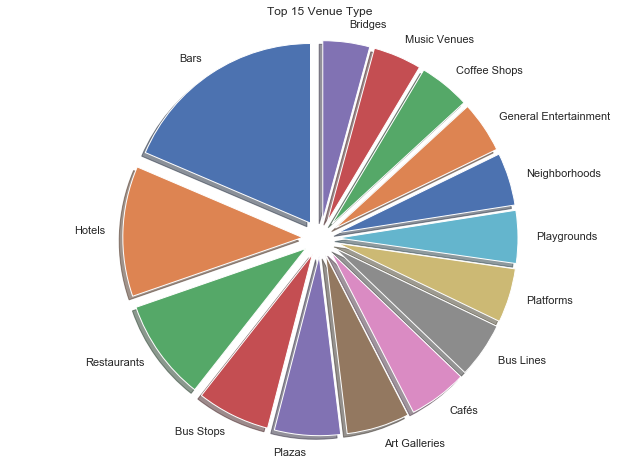

,category,VenueName
0,Bars,141
1,Hotels,89
2,Restaurants,69
3,Bus Stops,50
4,Plazas,45
5,Art Galleries,43
6,Cafés,40
7,Bus Lines,38
8,Platforms,37
9,Playgrounds,36


In [51]:
# Check top 15 most frequently occuring venue type
top_15_venue = NL_city_venues.groupby('category')['VenueName'].count().sort_values(ascending=False)[:15].reset_index()
labels = top_15_venue['category']
sizes  = top_15_venue['VenueName']
explode = [.1] * 15
# Plot
plt.title("Top 15 Venue Type")
ax1 = plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90)
plt.axis('equal')
plt.show()
top_15_venue

#### Conclusion: The most common venue type in all cities are Bars, Hotels, Restaurants and Bus Stops

#### Cities with highest mean score rating (given rating)

In [40]:
score_city = NL_city_venues.groupby(['City'])['score'].mean().sort_values(ascending=False).reset_index()
score_city

,City,score
0,Arnhem,7.200000
1,Rotterdam,7.011972
2,Delft,6.985000
3,The Hague,6.941892
4,Leiden,6.891463
5,Amsterdam,6.883673
6,Gouda,6.878505
7,Groningen,6.829545
8,Eindhoven,6.817808
9,Scheveningen,6.733858


#### Boxplot of ratingscores of each city, sorted by city

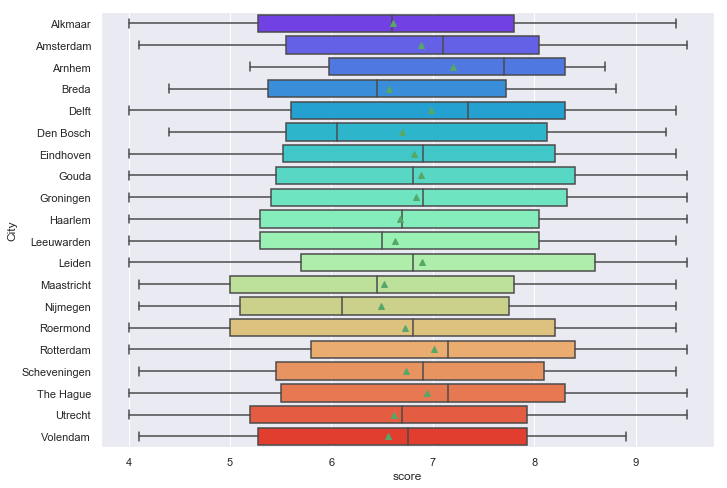

In [52]:
sns.boxplot(x='score',y='City',data=NL_city_venues,palette='rainbow', showmeans=True, 
            order = sorted(NL_city_venues.City.unique()))

#### Conclusion: The cities Arnhem, Rotterdam, Delft, The Hague and Leiden have the highest mean rating for the venues. Nijmegen has the lowest venue rating. But as you can see the scores have a large variation from low to high.

#### Details of venues of the cities ( Arnhem, Rotterdam, Delft, The Hague and Leiden) with the higest mean ratings for the venues

In [45]:
array = ['Arnhem', 'Rotterdam', 'Delft', 'The Hague', 'Leiden']
select_top_cities = NL_city_venues.loc[NL_city_venues['City'].isin(array)]
select_top_cities.head()

,City,City Latitude,City Longitude,VenueID,VenueName,score,category,catID,latitude,longitude,Primary_category
90,Rotterdam,51.922893,4.463179,5ca33ab1a22db7003987bb5f,rootz kitchen,4.7,Dutch Restaurants,5744ccdfe4b0c0459246b4d0,51.922397,4.470081,Food
91,Rotterdam,51.922893,4.463179,5795ef71498e24d6d8b987eb,Altijd in de buurt,5.9,Cafés,4bf58dd8d48988d16d941735,51.922557,4.467889,Food
92,Rotterdam,51.922893,4.463179,5c76c4d87a0eff00253bb56a,Tandoor16,7.7,Indian Restaurants,4bf58dd8d48988d10f941735,51.919447,4.465757,Food
93,Rotterdam,51.922893,4.463179,509e3f83e4b0191a3070b810,Starbucks,8.9,Coffee Shops,4bf58dd8d48988d1e0931735,51.925400,4.468955,Food
94,Rotterdam,51.922893,4.463179,4a72df7df964a5204cdb1fe3,Lebkov & Sons Rotterdam,9.4,Sandwich Places,4bf58dd8d48988d1c5941735,51.923679,4.469122,Food


#### Ratingscores of the different categories

In [46]:
# Top 10 venues based on the rating scores of the cities Den Bosch, Arnhem, Roermond, Scheveningen and Volendam
score_top_cities = select_top_cities.groupby(['category'])['score'].mean().sort_values(ascending=False)[:10].reset_index()
score_top_cities.head(10)

,category,score
0,Gym Pools,9.50
1,Greek Restaurants,9.40
2,BBQ Joints,9.30
3,Sports Bars,9.30
4,Beer Bars,9.10
5,Multiplexes,8.95
6,Churches,8.90
7,Thai Restaurants,8.80
8,Karaoke Bars,8.70
9,Intersections,8.70


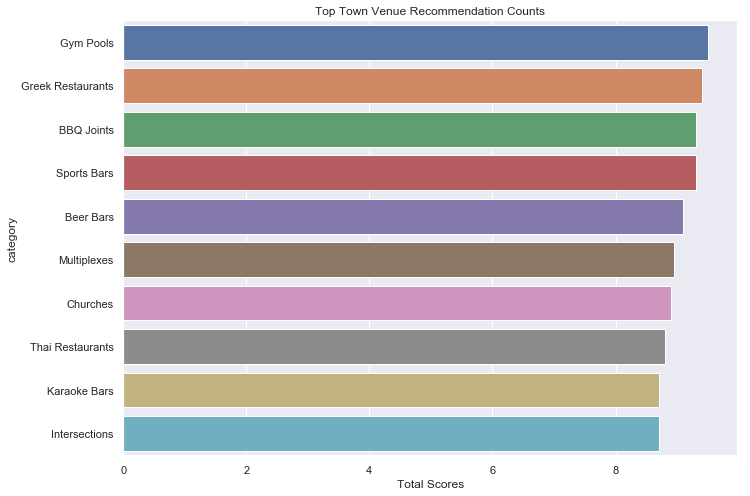

In [48]:
sns.set(rc={'figure.figsize':(11,8)})
ax0 = sns.barplot(data = score_top_cities, x = 'score', y = 'category')
ax0.set_title("Top Town Venue Recommendation Counts")
ax0.set_xlabel('Total Scores')
plt.show()

#### Conclusion: The best tourist venues in the cities with the highest venues scores are shown in the table and bar graph above. The best rated venues are in the category "Gym pools", "Greek Restaurants" and "BBW Joints".

#### Ratings scores of eacht VenueName to provide a recommendation for a place to go in a selected city of the visitors choice. In this case the city Alkmaar is used as example, but this could by any city you want

In [49]:
City_alkmaar_venues = NL_city_venues[(NL_city_venues['City'] == 'Alkmaar')]
City_alkmaar_venues.head()

,City,City Latitude,City Longitude,VenueID,VenueName,score,category,catID,latitude,longitude,Primary_category
306,Alkmaar,52.633736,4.740203,4cebf5469f776ea8e0af7022,Bodrum Döner Kebab,4.8,Middle Eastern Restaurants,4bf58dd8d48988d115941735,52.633775,4.742283,Food
307,Alkmaar,52.633736,4.740203,57c6e66e498efcc1c793901c,Spotlight,6.8,Coffee Shops,4bf58dd8d48988d1e0931735,52.635170,4.739033,Food
308,Alkmaar,52.633736,4.740203,5708d7a9498e3d3dfc3206be,Saladebar Oogst,4.4,Salad Places,4bf58dd8d48988d1bd941735,52.633423,4.742402,Food
309,Alkmaar,52.633736,4.740203,5c951ff998fbfc002cbeb428,Pluim,7.9,BBQ Joints,4bf58dd8d48988d1df931735,52.630592,4.743106,Food
310,Alkmaar,52.633736,4.740203,5c7be2ec0457b7002c6b2270,Eazie,4.6,Noodle Houses,4bf58dd8d48988d1d1941735,52.630394,4.747047,Food


In [145]:
City_alkmaar_venues = NL_city_venues[(NL_city_venues['City'] == 'Alkmaar')]
City_alkmaar_count = City_alkmaar_venues.groupby('Primary_category')['VenueName'].count().sort_values(ascending=False)[:10].reset_index()
City_alkmaar_count

,Primary_category,VenueName
0,Food,30
1,Outdoor,29
2,Nightlife,26
3,Entertainment,22
4,Travel,21


#### Recommendation for a food company in the city Alkmaar

In [146]:
#City_alkmaar_food = NL_city_venues[(NL_city_venues['City'] == 'Alkmaar') & (NL_city_venues['Primary_category']== 'Food')]
City_alkmaar_food = City_alkmaar_venues[(City_alkmaar_venues['Primary_category'] == 'Food')]
City_alkmaar_food.head()

,City,City Latitude,City Longitude,VenueID,VenueName,score,category,catID,latitude,longitude,Primary_category
306,Alkmaar,52.633736,4.740203,4cebf5469f776ea8e0af7022,Bodrum Döner Kebab,4.8,Middle Eastern Restaurants,4bf58dd8d48988d115941735,52.633775,4.742283,Food
307,Alkmaar,52.633736,4.740203,57c6e66e498efcc1c793901c,Spotlight,6.8,Coffee Shops,4bf58dd8d48988d1e0931735,52.635170,4.739033,Food
308,Alkmaar,52.633736,4.740203,5708d7a9498e3d3dfc3206be,Saladebar Oogst,4.4,Salad Places,4bf58dd8d48988d1bd941735,52.633423,4.742402,Food
309,Alkmaar,52.633736,4.740203,5c951ff998fbfc002cbeb428,Pluim,7.9,BBQ Joints,4bf58dd8d48988d1df931735,52.630592,4.743106,Food
310,Alkmaar,52.633736,4.740203,5c7be2ec0457b7002c6b2270,Eazie,4.6,Noodle Houses,4bf58dd8d48988d1d1941735,52.630394,4.747047,Food


In [147]:
City_alkmaar_food_top10 = City_alkmaar_food.groupby(['VenueName'])['score'].mean().sort_values(ascending=False)[:10].reset_index()
City_alkmaar_food_top10

,VenueName,score
0,Stadskaffee Laurens,9.4
1,Abby's,8.1
2,De Ritsz,8.0
3,Pluim,7.9
4,Hofman,7.9
5,De Binnenkomer,7.6
6,Schots Restaurant Hielander,7.5
7,Moeke's Pannenkoeken,7.5
8,Afhaalcentrum Toko Djaya Makmur,7.3
9,The Döner Company,7.3


#### If you, as visitor, want to go to a restaurant in Alkmaar, other Foursquare users are giving the highest reccomandation scores to the food companies; Stadskaffee Laurens, Abby's and De Ritsz.

<a id="section5"></a>
## Discussion and Conclusion

The Netherlands is a great country to visit for a short break or a longer holiday. And there are many nice cities known for their restaurants, nightlife, museums, market, squares and parks. So deciding which Netherlands city to visit can be difficult. Especially, if you have time to visit one city. What city would you visit?

In this notebook, a analysis of the different cities in the Netherlands is performed. The results may help visitors to choose a city based on their own interests. Using the Foursquare API, a good amount of venue recommendations is collected of 20 cities in the Netherlands. Sourcing from the venue recommendations from FourSquare for this assignment has its limitation; (1) limit of search distance of 500 meters and (2) there is a querying limit of 50 calls a day for venue ratings. So, because of the distance limit of 500 meters, the list of venues is not the complete list of all the available venues is the cities. Also because of the querying limit of 50 calls per day for venue ratings, a fictive list of score is calculated using the random module of Python. So the results of this assignment may significantly different, when more information are collected when changing the distance limit or using the real venue ratings.

The primary goal of this project is:
        1. to compare the 20 cities and determine how similar or dissimilar they are using K-means clustering.

Ad 1: The result of the K-means clustering is that there is some similarity between the cities in the Netherlands. There are 5 clusters of cities, with one large clusters with mixed venue types. The common venues of this large cluster are bars, hotels and restaurants, which a visitor can find in each city. But there are some cities with different venues, which may be interesting to go to. The 8 cities with special venues are Gouda, Leiden, Delft, Volendam, Nijmegen, Den Bosch, Arnhem and Breda. The most common venues in those cities are outdoor venues, boats and ferries, lakes, pools and playgrounds. 

The secondary goals are to analyse the diversity of the city venues:
        2. What are the most common venues types (venues count)  
        3. What are the recommending scores of the top 10 venues based on ‘ratings’
        4. Which 5 cities has the highest mean recommenending scores based on all venue 'ratings'
        
Ad 2: A visualization is created with the most common venue types of the cities in the Netherlands. The most common venues in the Dutch cities are bars, restaurants and Bus Stops. A visitor can find these venues in every city.  

Ad 3: If a visitor want to know what are the venue categories with the highest recommending scores (based on rating scores) a top10 list is created with the categories with the highest mean ratings. The best rated venues are in the category "Gym pools", "Greek Restaurants" and "BBW Joints". This has is limitation, because the ratings score have a large variation, from low to high. Not all rating scores of food companies are good.  


Ad 4: The top 5 cities with the highest mean recommending scores are Arnhem', 'Rotterdam', 'Delft', 'The Hague', 'Leiden’. As a bonus a script is written to explorer the best food companies in a city.

#### Thank your for reading